# Time Series
# Auto ARIMA using Pyramid ARIMA Python Package
https://datafai.com/auto-arima-using-pyramid-arima-python-package/

Unit 18.1.3

In [ ]:
#!pip install pmdarima

In [1]:
import warnings
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

%matplotlib inline
from matplotlib.pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
#import pyramid as pm
import pmdarima as pm
from sklearn import metrics
# from pyramid.arima import auto_arima
from pmdarima import auto_arima
warnings.filterwarnings('ignore')

Import magic command “InteractiveShell” to print many statements on the same line and import flights data in built in the seaborn library.

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
flight_data = sns.load_dataset("flights")
flight_data.head()
flight_data.tail()
flight_data.shape
flight_data.describe()
flight_data.info()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


,year,month,passengers
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390
143,1960,Dec,432


(144, 3)

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [4]:
# Create Pivot Table using Pandas Pivot Table method
flight_data_pivot = flight_data.pivot('month', 'year', 'passengers')
flight_data_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


We will now generate heat map to visualize seasonality of the travelers by each month. It can easily be seen that traffic in a year peaks during summer months of July and August

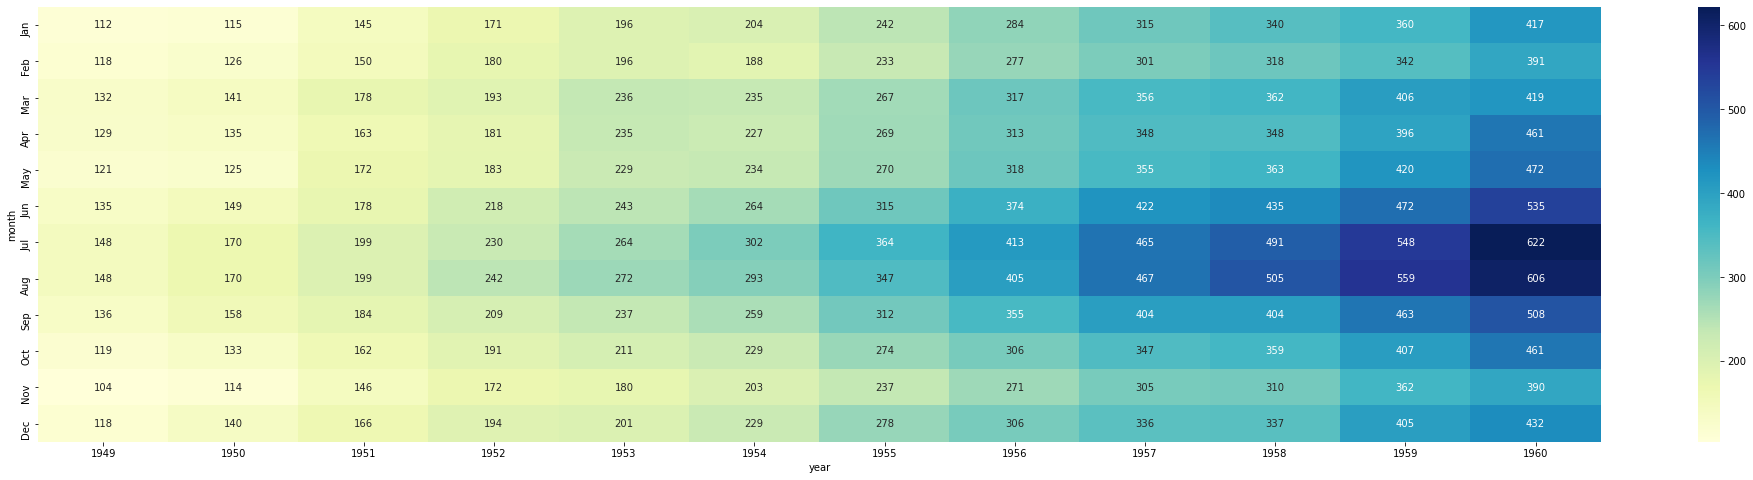

In [7]:
plt.figure(figsize=(35,8))
sns.heatmap(flight_data_pivot, annot=True, fmt="d", cmap="YlGnBu")
plt.show();

Create a date range variable which captures date range of the above data. We are using Pandas “date_range” method to create timestamped variable on a monthly basis.

In [8]:
month = pd.date_range('19490131', periods=144, freq='M')
month

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')

In [9]:
# Insert the date time column in the original data for doing the time series modeling
flight_data['datestamp'] = month
flight_data.head()

,year,month,passengers,datestamp
0,1949,Jan,112,1949-01-31
1,1949,Feb,118,1949-02-28
2,1949,Mar,132,1949-03-31
3,1949,Apr,129,1949-04-30
4,1949,May,121,1949-05-31


In [10]:
# Select only selected variables by variable names. In this case we are selecting dateime and # passengers data using loc
data = flight_data.loc[:, ('datestamp', 'passengers')]
data.head()
data.describe()

,datestamp,passengers
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121


,passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [11]:
# Reindex using method “set_index” the data on datetime variable
data.set_index('datestamp', inplace=True)
data.head()

,passengers
datestamp,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


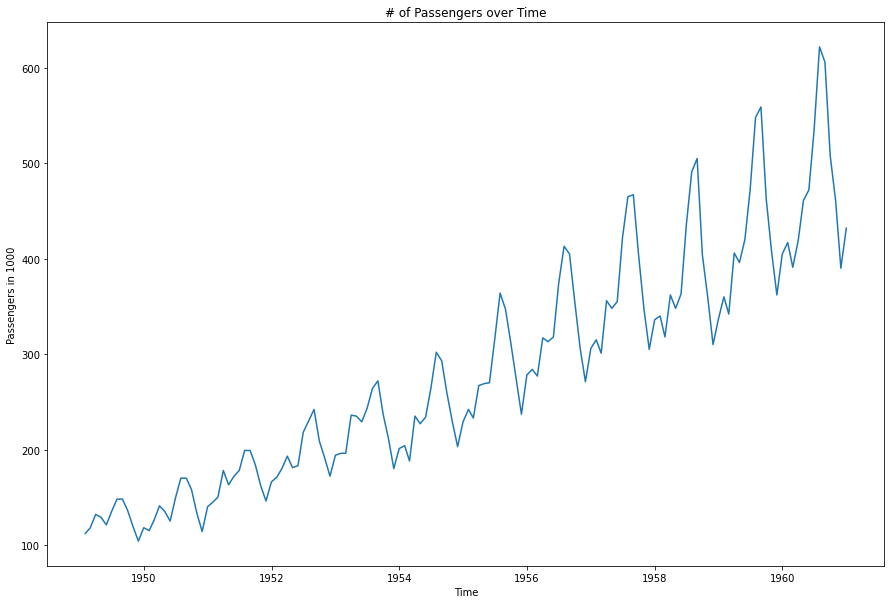

In [12]:
# Plot the timeseries data, add x label, y label and title of the plot
plt.figure(figsize=(15,10))
plt.plot(data)
plt.xlabel('Time')
plt.ylabel('Passengers in 1000')
plt.title('# of Passengers over Time')
plt.show();

## Decompose
Decompose timeseries to trend, seasonal and random components using multiplicative model and do subplots with color schemes using hex color picker codes.

In [30]:
decomposition = seasonal_decompose(data, model = 'multiplicative')

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


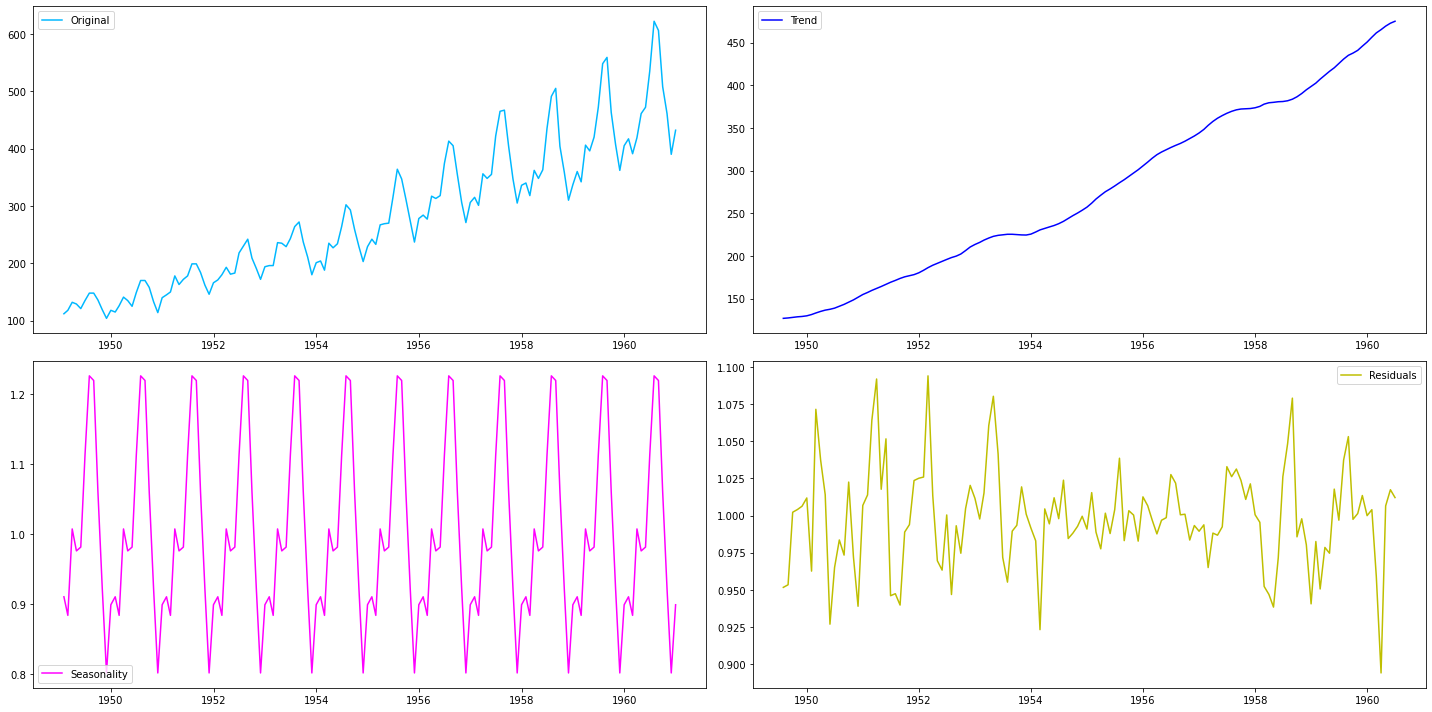

In [14]:
# plot trend of the series
plt.figure(figsize=(20,10))

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(221)
plt.plot(data, color = '#00b8ff', label='Original')
plt.legend(loc='best')
plt.subplot(222)
plt.plot(trend, 'b', label='Trend')
plt.legend(loc='best')

plt.subplot(223)
plt.plot(seasonal, color = '#ff00ff', label='Seasonality')
plt.legend(loc='best')
plt.subplot(224)
plt.plot(residual, 'y', label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show();

Similarly you can decompose timeseries to trend, seasonal and random components using additive model using the below code

In [15]:
decomposition = seasonal_decompose(data, model ='additvie')

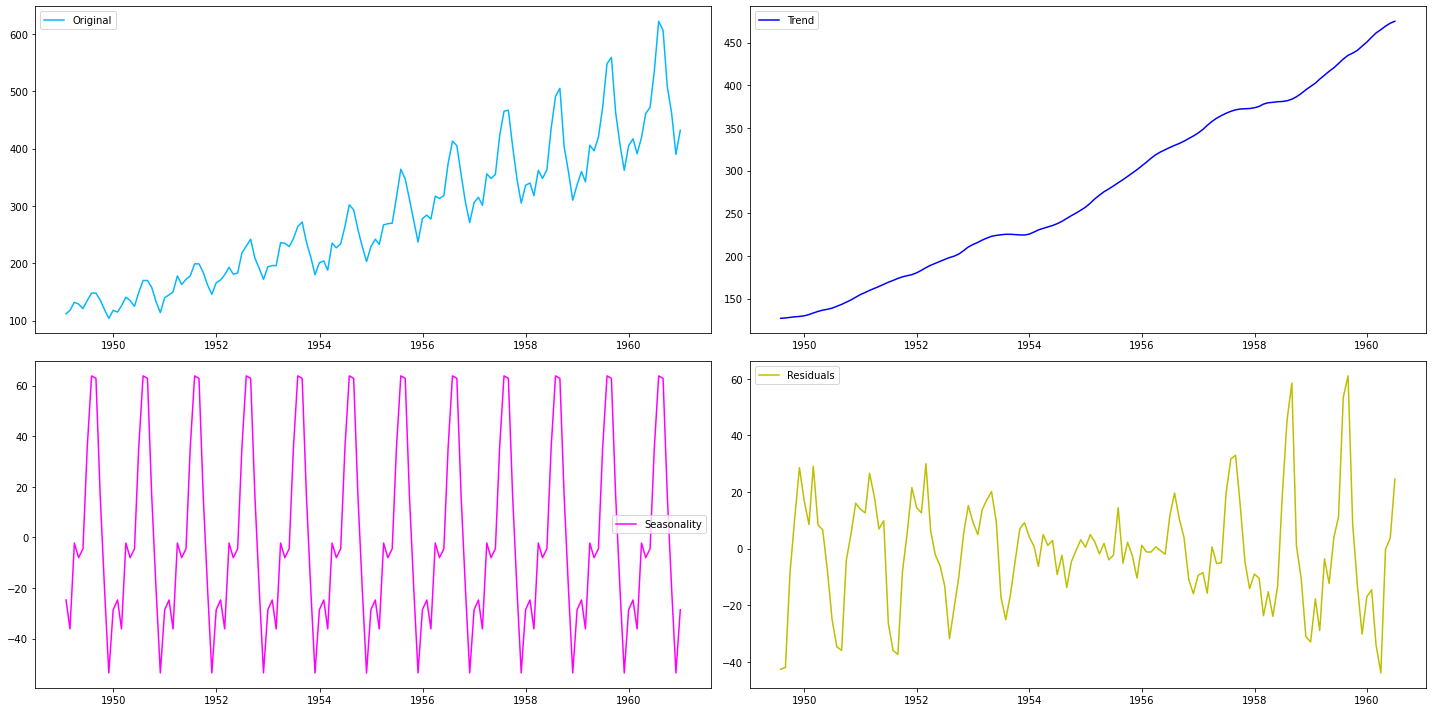

In [16]:
# plot trend of the series
plt.figure(figsize=(20,10))

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(221)
plt.plot(data, color = '#00b8ff', label='Original')
plt.legend(loc='best')
plt.subplot(222)
plt.plot(trend, 'b', label='Trend')
plt.legend(loc='best')

plt.subplot(223)
plt.plot(seasonal, color = '#ff00ff', label='Seasonality')
plt.legend(loc='best')
plt.subplot(224)
plt.plot(residual, 'y', label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show();
# Here is how the additive time-series decomposition looks like-

Test for the stationarity of the time series using Augmented Dickey Fuller Test. Since p value is higher than alpha, we can’t reject the null hypothesis (Series is non stationary). Therefore, we would need to use the “Integrated (I)” term of the time series in a good model.

In [31]:
from pmdarima.arima.stationarity import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.is_stationary(data)

<ipython-input-31-1fb699a68402>:3: DeprecationWarning: is_stationary is deprecated and will be removed in a future release of pmdarima. Use should_diff instead.
  adf_test.is_stationary(data)


(0.01, False)

In [18]:
# Split the data in train and test datasets to validate the forecast on the test data
train, test = data[:100], data[100:]
train.shape
test.shape

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(100, 1)

(44, 1)

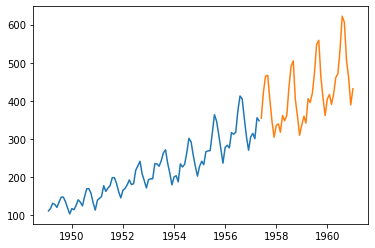

In [19]:
plt.plot(train)
plt.plot(test)
plt.show();
# Here is how the Train and Test data look like-

Now is the time that we can fit a Auto ARIMA model, which works on the efficient Grid Search and Random Search concepts to find the most optimal parameters to find the best fitting time series model. Please keep in mind that small p,d,q represent the non-seasonal components and capital P,D,Q represent seasonal components.

In this case, we are trying values from 1 to 8 for each of the above parameters in the efficient parameters search.

In [21]:
Arima_model = pm.auto_arima(train, start_p=1, start_q=1, max_p=8, max_q=8, 
                         start_P=0, start_Q=0, max_P=8, max_Q=8, m=12, 
                         seasonal=True, trace=True, d=1, D=1,
                        error_action='warn', suppress_warnings=True,
                        stepwise=True, random_state=20, n_fits=30)
Arima_model.summary()
# Here is the model summary, lower AIC and BIC values denote better performing models

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=647.341, Time=0.11 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=650.796, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=644.203, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=644.733, Time=0.17 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=645.995, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=646.172, Time=0.30 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=646.187, Time=0.25 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=644.600, Time=0.17 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.99 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=647.442, Time=0.08 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=646.085, Time=0.20 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=645.647, Time=0.21 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=644.346, Time=0.13 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=647.580, Time=0.30 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  100
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -319.101
Date:                            Sun, 30 May 2021   AIC                            644.203
Time:                                    21:18:08   BIC                            651.601
Sample:                                         0   HQIC                           647.182
                                            - 100                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2434      0.097     -2.512      0.012      -0.433      -0.054
ar.S.L12      -0.2127      0.087     -2.432      0.015      -0.384      -0.041
sigma2        89.1842     14.080      6.334      0.000      61.587     116.781
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.43
Prob(Q):                              0.97   Prob(JB):                         0.30
Heteroskedasticity (H):               1.32   Skew:                             0.40
Prob(H) (two-sided):                  0.46   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predictions
Use the best model to make predictions about the Test data

In [22]:
prediction = pd.DataFrame(Arima_model.predict(n_periods=44), index=test.index)
prediction.columns = ['Predicted_Passengers']
prediction
# Here is how the predicted values for the test time period looks like-

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Predicted_Passengers
datestamp,
1957-05-31,353.433649
1957-06-30,406.781321
1957-07-31,447.984392
1957-08-31,438.051605
1957-09-30,391.246543
1957-10-31,344.585092
1957-11-30,309.159969
1957-12-31,345.436075
1958-01-31,353.798005


C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


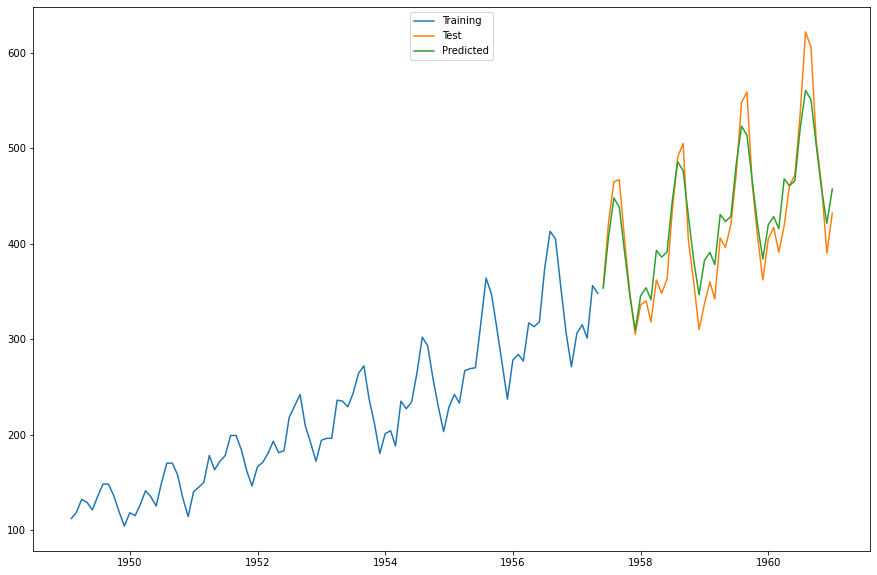

In [23]:
# Plot actual vs predicted values for the training and the test data
plt.figure(figsize=(15,10))
plt.plot(train, label='Training')
plt.plot(test, label='Test')
plt.plot(prediction, label='Predicted')
plt.legend(loc='upper center')
plt.show();

In [32]:
# Add the predicted values in the original “Test” data to compute error in predictions. Sample output is shown below as well.
test['Predicted_Passengers'] = prediction
test['Error'] = test['passengers'] - test['Predicted_Passengers']
test.head(5)

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,passengers,Predicted_Passengers,Error
datestamp,,,
1957-05-31,355,353.433649,1.566351
1957-06-30,422,406.781321,15.218679
1957-07-31,465,447.984392,17.015608
1957-08-31,467,438.051605,28.948395
1957-09-30,404,391.246543,12.753457


Compute error metrics such as Mean Absolute Error, Mean Squared Error and Median Absolute Error.

In [25]:
metrics.mean_absolute_error(test.passengers, test.Predicted_Passengers)

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


21.53863134378322

In [27]:
metrics.mean_squared_error(test.passengers, test.Predicted_Passengers)

686.7476392899507

In [28]:
metrics.median_absolute_error(test.passengers, test.Predicted_Passengers)

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


22.334088709568533

Now we can generate model diagnostic metrics as discussed in the links at the very beginning of this article. Overall, model performance looks quite robust from these charts.

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


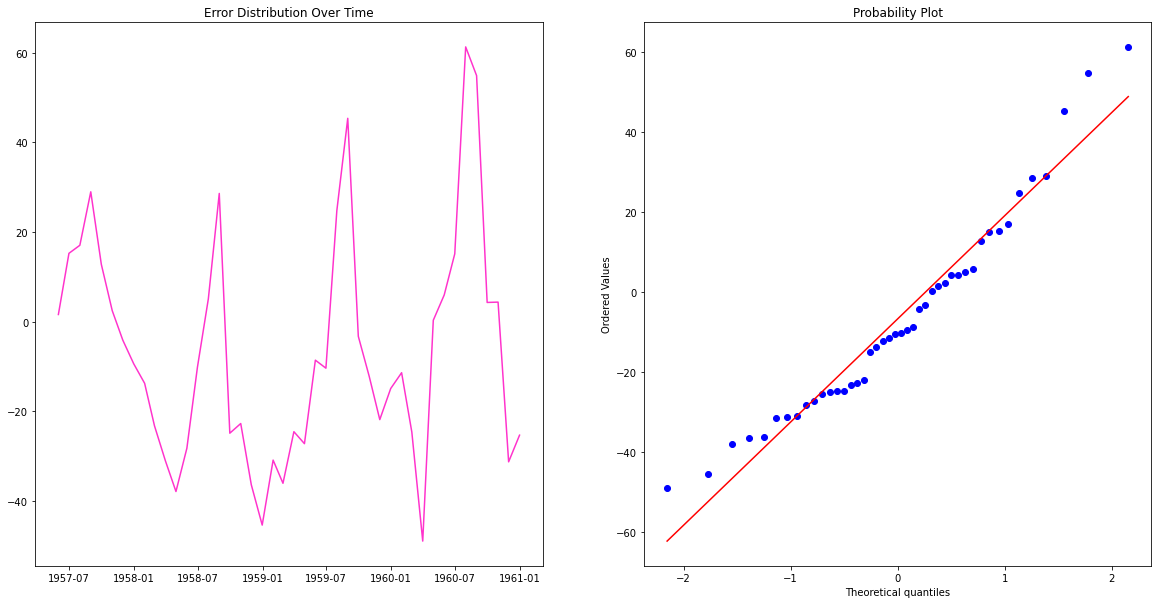

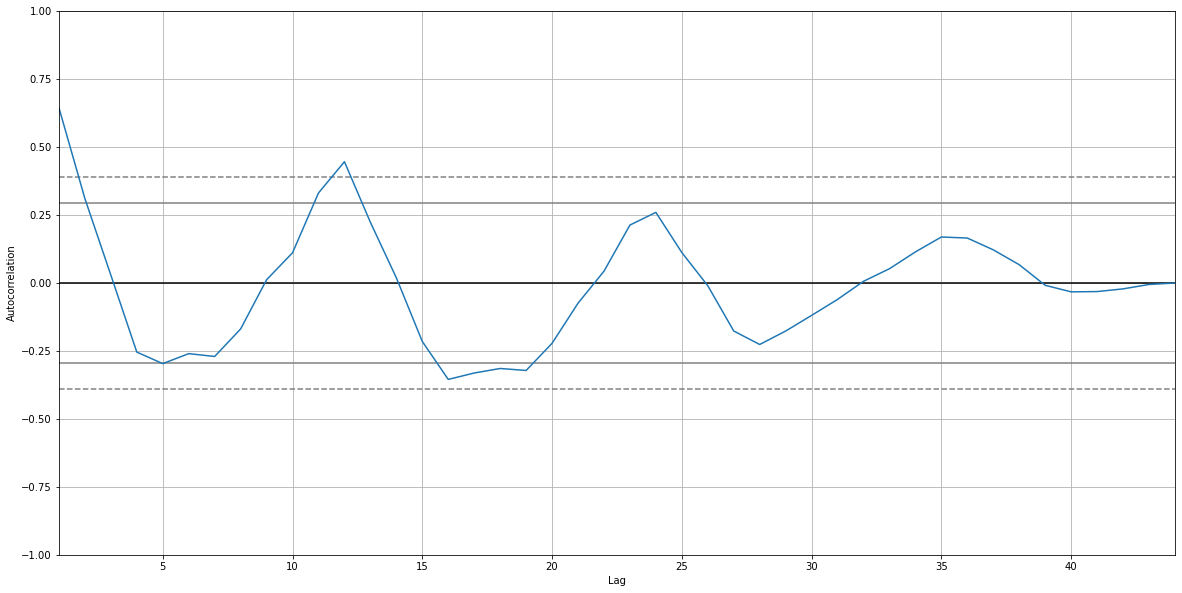

In [29]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(test.Error, color='#ff33CC')
plt.title('Error Distribution Over Time')
plt.subplot(122)
scipy.stats.probplot(test.Error, plot=plt)
plt.show();

plt.figure(figsize=(20,10))
pm.autocorr_plot(test.Error)
plt.show();

In sum, we built a time-series model using Pyramid-Arima package and used optimized grid search to find the best parameters. Overall the performance of this model is quite satisfactory.